In [1]:
!pip install category_encoders


In [1]:

import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None)

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
plt.style.use("ggplot")
import missingno as mso

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders import TargetEncoder
from sklearn.compose import ColumnTransformer



In [2]:
data = pd.read_csv('Loan_default.csv')
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [4]:
print(data['LoanTerm'].nunique())


5


In [ ]:
num_unique_terms = data['LoanTerm'].nunique()
print(f"Number of unique loan terms: {num_unique_terms}")

unique_terms = data['LoanTerm'].unique()
print(f"Unique loan terms: {sorted(unique_terms)}")


Number of unique loan terms: 5
Unique loan terms: [12, 24, 36, 48, 60]


In [6]:
print(data['LoanTerm'].value_counts())


LoanTerm
48    51166
60    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64


In [7]:
data['LoanTerm'] = data['LoanTerm'].replace({48: 6, 60: 30})


In [8]:
print(data['LoanTerm'].value_counts())


LoanTerm
6     51166
30    51154
36    51061
24    51009
12    50957
Name: count, dtype: int64


In [ ]:
import pandas as pd

terms_to_sample = [6, 12, 24, 30, 36]
indices_to_change = []

for term in terms_to_sample:
    term_indices = data[data['LoanTerm'] == term].index

    sampled_indices = term_indices.to_series().sample(n=8000, random_state=42)
    
    indices_to_change.extend(sampled_indices)

data.loc[indices_to_change, 'LoanTerm'] = 18

print(data['LoanTerm'].value_counts().sort_index())


LoanTerm
6     43166
12    42957
18    40000
24    43009
30    43154
36    43061
Name: count, dtype: int64


In [10]:
data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,30,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,6,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,30,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,6,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


In [11]:
print(data['LoanTerm'].value_counts())


LoanTerm
6     43166
30    43154
36    43061
24    43009
12    42957
18    40000
Name: count, dtype: int64


In [12]:
data.isnull().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

Label Encoding

In [14]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
obj_col = ['HasCoSigner','LoanPurpose','HasDependents', 'HasMortgage','MaritalStatus', 'EmploymentType', 'Education']
for col in obj_col:
    data[col] = le.fit_transform(data[col])
    
data = data.drop(['LoanID'], axis=1)

In [15]:
data.dtypes

Age                 int64
Income              int64
LoanAmount          int64
CreditScore         int64
MonthsEmployed      int64
NumCreditLines      int64
InterestRate      float64
LoanTerm            int64
DTIRatio          float64
Education           int32
EmploymentType      int32
MaritalStatus       int32
HasMortgage         int32
HasDependents       int32
LoanPurpose         int32
HasCoSigner         int32
Default             int64
dtype: object

In [16]:
data.rename(columns={'Default': 'm1'}, inplace=True)


In [17]:
data


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,m1
0,56,85994,50587,520,80,4,15.23,36,0.44,0,0,0,1,1,4,1,0
1,69,50432,124440,458,15,1,4.81,30,0.68,2,0,1,0,0,4,1,0
2,46,84208,129188,451,26,3,21.17,24,0.31,2,3,0,1,1,0,0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,1,0,1,0,0,1,0,0
4,60,20437,9139,633,8,4,6.51,6,0.73,0,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14.11,12,0.85,0,0,1,0,0,4,0,0
255343,32,51953,189899,511,14,2,11.55,24,0.21,1,1,0,0,0,3,0,1
255344,56,84820,208294,597,70,3,5.29,30,0.50,1,2,1,1,1,0,1,0
255345,42,85109,60575,809,40,1,20.90,6,0.44,1,1,2,1,1,4,0,0


In [18]:
corr = data.corrwith(data['m1'])
print(corr.sort_values(ascending=False))

m1                1.000000
InterestRate      0.131273
LoanAmount        0.086659
EmploymentType    0.041010
NumCreditLines    0.028330
DTIRatio          0.019236
LoanTerm         -0.000570
MaritalStatus    -0.007902
LoanPurpose      -0.010096
Education        -0.022835
HasMortgage      -0.022856
CreditScore      -0.034166
HasDependents    -0.034678
HasCoSigner      -0.039109
MonthsEmployed   -0.097374
Income           -0.099119
Age              -0.167783
dtype: float64


In [19]:
X = data.drop(['m1'], axis=1)
y = data['m1']

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from catboost import CatBoostClassifier
import itertools
models = [
    CatBoostClassifier(verbose=False),
    XGBClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
    KNeighborsClassifier(),
    GaussianNB()
]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [21]:
print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")

X train shape: (178742, 16)
X test shape: (76605, 16)


Visualizing Training and Test Data based on Target Variable


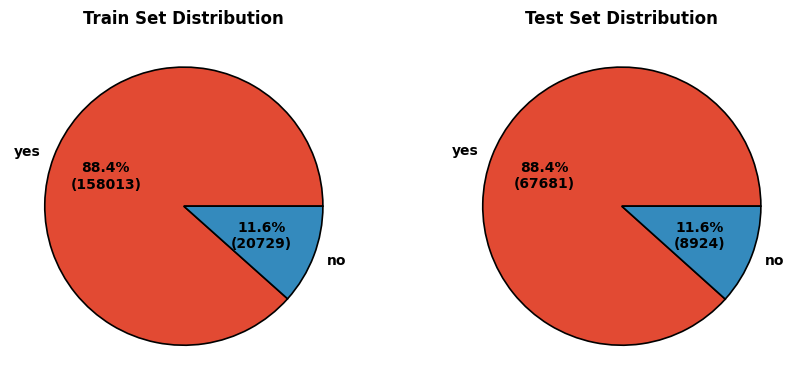

In [22]:
import matplotlib.pyplot as plt


df_pct_train = y_train.value_counts().to_frame().rename(index={0: 'yes', 1: 'no'})
df_pct_train.columns = ['count']

df_pct_test = y_test.value_counts().to_frame().rename(index={0: 'yes', 1: 'no'})
df_pct_test.columns = ['count']

labels_train = df_pct_train.index.to_list()
values_train = df_pct_train['count']

labels_test = df_pct_test.index.to_list()
values_test = df_pct_test['count']

def autopct_fun(abs_values):
    gen = iter(abs_values)
    return lambda pct: f"{pct:.1f}%\n({next(gen)})"

fig, axes = plt.subplots(1, 2, figsize=(9, 4))

axes[0].pie(
    x=values_train,
    labels=labels_train,
    autopct=autopct_fun(values_train),
    wedgeprops={'linewidth': 1.2, 'edgecolor': 'black'},
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)
axes[0].set_title('Train Set Distribution', fontsize=12, fontweight='bold')

axes[1].pie(
    x=values_test,
    labels=labels_test,
    autopct=autopct_fun(values_test),
    wedgeprops={'linewidth': 1.2, 'edgecolor': 'black'},
    textprops={'fontsize': 10, 'fontweight': 'bold'}
)
axes[1].set_title('Test Set Distribution', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


In [23]:
# Quantitative variables:
num_cols = ["Age", "Income", "LoanAmount", "CreditScore", "MonthsEmployed",
            "NumCreditLines", "InterestRate", "LoanTerm", "DTIRatio"]

# Categorical variables:
cat_cols = ["Default", "Education", "EmploymentType", "MaritalStatus",
            "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

In [24]:

numerical_variables = X_train.select_dtypes(include = ["int", "float"]).columns.to_list()

categorical_variables = X_train.select_dtypes(include = ["object", "category"]).columns.to_list()

In [35]:
from category_encoders import TargetEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(transformers=[
    ('te', TargetEncoder(min_samples_leaf=1, smoothing=10), categorical_variables),
    ('scaler', MinMaxScaler(), numerical_variables)
], remainder="passthrough", verbose_feature_names_out=False).set_output(transform="pandas")

X_train_prep = preprocessor.fit_transform(X_train, y_train)
X_test_prep = preprocessor.transform(X_test)

print(f"X train shape: {X_train_prep.shape}")
print(f"X test shape: {X_test_prep.shape}")


X train shape: (178742, 16)
X test shape: (76605, 16)


In [26]:
scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]


In [27]:
e1 = XGBClassifier(objective = "binary:logistic", 
                   scale_pos_weight = scale_pos_weight, 
                   random_state = 123)
e2 = LGBMClassifier(class_weight = 'balanced', 
                    random_state = 123, 
                    verbose = -1)
e3 = CatBoostClassifier(auto_class_weights = 'Balanced',
                        random_state = 123, 
                        verbose = 0)
e4 = LogisticRegression(class_weight = 'balanced', 
                        solver = 'sag', 
                        random_state = 123)

In [28]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

scale_pos_weight = y_train.value_counts()[0] / y_train.value_counts()[1]

lr = LogisticRegression(class_weight='balanced', solver='sag', random_state=42)
svm = LinearSVC(class_weight='balanced', random_state=42)
xgb = XGBClassifier(objective="binary:logistic", tree_method="exact", scale_pos_weight=scale_pos_weight, random_state=42)
lgbm = LGBMClassifier(class_weight='balanced', random_state=42, verbose=-1)
cb = CatBoostClassifier(auto_class_weights='Balanced', random_state=42, verbose=0)

voting = VotingClassifier(estimators=[("xgb", xgb), ("lgbm", lgbm), ("cb", cb), ("lr", lr)])

base_models = {
    'Logistic_Regression': lr,
    'SVC': svm,
    'XGB': xgb,
    'LGBM': lgbm,
    'CatBoost': cb,
    'Voting': voting
}


In [29]:
from sklearn.metrics import classification_report

models_to_evaluate = {'Logistic_Regression': lr, 'SVC': svm}

for name, model in models_to_evaluate.items():
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))



Classification Report for Logistic_Regression:

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     67681
           1       0.22      0.69      0.33      8924

    accuracy                           0.67     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.67      0.73     76605


Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     67681
           1       0.22      0.69      0.33      8924

    accuracy                           0.67     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.67      0.73     76605



In [30]:
from sklearn.metrics import classification_report

models_to_evaluate = {'XGB': xgb,
    'LGBM': lgbm}

for name, model in models_to_evaluate.items():
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))



Classification Report for XGB:

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     67681
           1       0.23      0.63      0.34      8924

    accuracy                           0.72     76605
   macro avg       0.59      0.68      0.58     76605
weighted avg       0.86      0.72      0.76     76605


Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.94      0.70      0.80     67681
           1       0.23      0.68      0.34      8924

    accuracy                           0.70     76605
   macro avg       0.59      0.69      0.57     76605
weighted avg       0.86      0.70      0.75     76605



In [31]:

from sklearn.metrics import classification_report

models_to_evaluate = {'CatBoost': cb}

for name, model in models_to_evaluate.items():
    model.fit(X_train_prep, y_train)
    y_pred = model.predict(X_test_prep)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))



Classification Report for CatBoost:

              precision    recall  f1-score   support

           0       0.94      0.73      0.82     67681
           1       0.24      0.63      0.34      8924

    accuracy                           0.72     76605
   macro avg       0.59      0.68      0.58     76605
weighted avg       0.86      0.72      0.77     76605



Applying SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE only on training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)

print(f"Before SMOTE, counts of label '1': {sum(y_train == 1)}")
print(f"After SMOTE, counts of label '1': {sum(y_train_resampled == 1)}")


Before SMOTE, counts of label '1': 20729
After SMOTE, counts of label '1': 158013


In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)

models = {'Logistic_Regression': lr, 'SVC': svm}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_prep)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))



Classification Report for Logistic_Regression:

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.68      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.74     76605


Classification Report for SVC:

              precision    recall  f1-score   support

           0       0.94      0.68      0.79     67681
           1       0.22      0.68      0.33      8924

    accuracy                           0.68     76605
   macro avg       0.58      0.68      0.56     76605
weighted avg       0.86      0.68      0.73     76605



In [34]:


from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_prep, y_train)

models = {'XGB': xgb,
    'LGBM': lgbm}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_prep)
    print(f"\nClassification Report for {name}:\n")
    print(classification_report(y_test, y_pred))



Classification Report for XGB:

              precision    recall  f1-score   support

           0       0.94      0.67      0.78     67681
           1       0.21      0.68      0.32      8924

    accuracy                           0.67     76605
   macro avg       0.58      0.67      0.55     76605
weighted avg       0.86      0.67      0.73     76605


Classification Report for LGBM:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     67681
           1       0.60      0.06      0.12      8924

    accuracy                           0.89     76605
   macro avg       0.74      0.53      0.53     76605
weighted avg       0.86      0.89      0.84     76605

